## Evaluate ranking metrics before

ngc batch run --name "tranf4rec-htune-v06-gpt2" --preempt RUNONCE --ace nv-us-west-2 --instance dgx1v.32g.2.norm --commandline "nvidia-smi && wandb login 76eea90114bb1cdcbafe151b262e4a5d4ff60f12 && date && git pull origin experimentation && date && bash script/run_transformer_v2.bash htune-v06-gpt2 full_noneg session_cooccurrence --start_date 2019-10-01 --end_date 2019-10-15 --model_type gpt2 --loss_type cross_entropy --per_device_eval_batch_size 128 --similarity_type concat_mlp --tf_out_activation tanh --all_rescale_factor 1.0 --neg_rescale_factor 0.0 --inp_merge mlp --hidden_act gelu_new --learning_rate_warmup_steps 0 --learning_rate_num_cosine_cycles 4.0 --dataloader_drop_last --compute_metrics_each_n_steps 50 --max_seq_len 20 --num_train_epochs 8 --per_device_train_batch_size 64 --learning_rate 0.002765352013424135 --learning_rate_schedule constant_with_warmup --dropout 0.1 --weight_decay 3.1625564350525762e-06 --d_model 256 --n_layer 2 --n_head 2 --log_predictions --log_attention_weights && date" --result /results --image "nvidian/prj-recsys/transf4rec_exp:0.1.0" --org nvidian --team prj-recsys --datasetid 66609:/data

- Running it again logging predictions and attention weights
Id: 1516063

laced-fire-1297
https://wandb.ai/gspmoreira/huggingface/runs/2iqaecgb/overview?workspace=user-gspmoreira
AOD_all_Test_ndcg@1000_all: 0.5304

In [1]:
import os
import pandas as pd
import seaborn as sns

In [2]:
BASE_PATH = '1550809_azure-oath-2072_partial/'

In [3]:
preds_df = pd.read_parquet(os.path.join(BASE_PATH, 'preds_date_2019-10-15.parquet'))
len(preds_df)

OSError: Passed non-file path: 1550809_azure-oath-2072_partial/preds_date_2019-10-15.parquet

In [ ]:
preds_df.columns

In [ ]:
preds_df

In [ ]:
COLS_TO_SQUEEZE = ['metadata_sess_pid_seq', 'metadata_seq_pos', 'metadata_seq_len']

for col in COLS_TO_SQUEEZE:
    print (col)
    preds_df[col] = preds_df[col].apply(lambda x: x[0])

## Analyzing metrics

In [ ]:
metrics_Cols = ['metric_all_ndcg@1000', 'metric_all_avg_precision@1000', 'metric_all_recall@1000']

In [ ]:
preds_df[metrics_Cols].mean()

In [ ]:
preds_df['metric_all_recall@1000'].hist()

In [ ]:
preds_df['metric_all_ndcg@1000'].hist()

In [ ]:
preds_df.groupby('metric_all_ndcg@1000').size().sort_values(ascending=False)

In [ ]:
preds_df['metric_all_avg_precision@1000'].hist()

## Computing categ features popularity

In [ ]:
days = []
for day in range(2,15):
    days.append(pd.read_parquet(os.path.join(BASE_PATH, 'preds_date_2019-10-{:02}.parquet'.format(day))))
    
preds_full_df = pd.concat(days)

for col in COLS_TO_SQUEEZE:
    print (col)
    preds_full_df[col] = preds_full_df[col].apply(lambda x: x[0])

In [ ]:
pid_pop_df = preds_full_df.groupby('metadata_sess_pid_seq').size().to_frame('pid_count').reset_index()
pid_pop_df

## Computing stats on models accuracy

In [4]:
preds_df = preds_df.merge(pid_pop_df, how='left')

NameError: name 'preds_df' is not defined

In [16]:
preds_df.head(5)

,metadata_seq_len,metadata_seq_pos,metadata_sess_bid_seq,metadata_sess_ccid_seq,metadata_sess_csid_seq,metadata_sess_pid_seq,metadata_sess_product_recency_seq,metric_all_avg_precision@10,metric_all_avg_precision@100,metric_all_avg_precision@1000,...,metric_all_ndcg@5,metric_all_precision@10,metric_all_precision@100,metric_all_precision@1000,metric_all_precision@5,metric_all_recall@10,metric_all_recall@100,metric_all_recall@1000,metric_all_recall@5,pid_count
0,7,2,[145],[131],[15],4314,[-2.08184],0.0,0.012346,0.012346,...,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0,3
1,7,3,[1363],[131],[15],39336,[-2.1278293],0.0,0.021739,0.021739,...,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0,1
2,7,4,[4305],[131],[15],3293,[-2.097333],0.0,0.031250,0.031250,...,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0,8
3,7,5,[849],[131],[15],7380,[-2.0581756],0.0,0.000000,0.008929,...,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0,4
4,7,6,[145],[131],[15],4508,[-2.0788658],0.0,0.000000,0.001160,...,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0,6


### Analyzing correlation between accuracy and label metadata stats

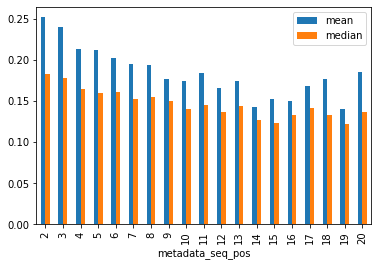

In [14]:
preds_df.groupby('metadata_seq_pos')['metric_all_ndcg@1000'].agg(['mean', 'median']).plot.bar()

In [15]:
pd.set_option("display.max_rows", None)
preds_df.groupby(['metadata_seq_len', 'metadata_seq_pos'])['metric_all_ndcg@1000'].agg(['mean'])

mean
metadata_seq_len metadata_seq_pos          
2                2                 0.262146
3                2                 0.242089
                 3                 0.231625
4                2                 0.248414
                 3                 0.248776
                 4                 0.209139
5                2                 0.250889
                 3                 0.252395
                 4                 0.224794
                 5                 0.199061
6                2                 0.224542
                 3                 0.234734
                 4                 0.210083
                 5                 0.204210
                 6                 0.195376
7                2                 0.275984
                 3                 0.223683
                 4                 0.188869
                 5                 0.236237
                 6                 0.202192
                 7                 0.172976
8                2                 0.257547
                 3                 0.231363
                 4                 0.181394
                 5                 0.225106
                 6                 0.178368
                 7                 0.174371
                 8                 0.164118
9                2                 0.239950
                 3                 0.234495
                 4                 0.232886
                 5                 0.179076
                 6                 0.182364
                 7                 0.184885
                 8                 0.167458
                 9                 0.193830
10               2                 0.262474
                 3                 0.333303
                 4                 0.211997
                 5                 0.218059
                 6                 0.175395
                 7                 0.191726
                 8                 0.201215
                 9                 0.184710
                 10                0.139246
11               2                 0.263868
                 3                 0.228148
                 4                 0.182058
                 5                 0.174908
                 6                 0.198325
                 7                 0.267242
                 8                 0.228322
                 9                 0.152660
                 10                0.142009
                 11                0.159473
12               2                 0.249827
                 3                 0.217548
                 4                 0.226313
                 5                 0.226721
                 6                 0.248619
                 7                 0.232941
                 8                 0.195840
                 9                 0.230439
                 10                0.312256
                 11                0.251918
                 12                0.185965
13               2                 0.281032
                 3                 0.311801
                 4                 0.274551
                 5                 0.275109
                 6                 0.264683
                 7                 0.243221
                 8                 0.182262
                 9                 0.157365
                 10                0.234282
                 11                0.149735
                 12                0.184520
                 13                0.174584
14               2                 0.223708
                 3                 0.269497
                 4                 0.245161
                 5                 0.183848
                 6                 0.271537
                 7                 0.124401
                 8                 0.189607
                 9                 0.127921
                 10                0.179189
                 11                0.113104
                 12                0.151286
                 13                

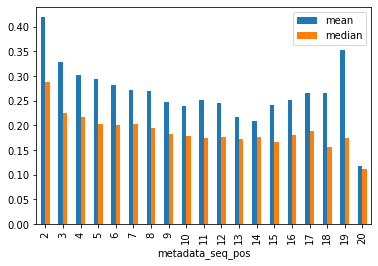

In [19]:
preds_df.groupby('metadata_seq_pos')['metric_all_ndcg@1000'].agg(['mean', 'median']).plot.bar()

In [20]:
preds_df['ndcg@1000_bin'] = pd.cut(preds_df['metric_all_ndcg@1000'], 4)

In [21]:
preds_df.groupby('ndcg@1000_bin').size()

ndcg@1000_bin
(-0.001, 0.25]    6830
(0.25, 0.5]       2891
(0.5, 0.75]        726
(0.75, 1.0]       1534
dtype: int64

In [22]:
preds_df.groupby('ndcg@1000_bin')[['metadata_seq_pos',
                                   'pid_count']].agg(['mean', 'median'])

metadata_seq_pos          pid_count       
                           mean median        mean median
ndcg@1000_bin                                            
(-0.001, 0.25]         5.927379      4   33.664129      6
(0.25, 0.5]            5.268073      4   93.484262     29
(0.5, 0.75]            4.707989      3  121.179063     50
(0.75, 1.0]            3.989570      3  165.542373     80

In [23]:
preds_df[['metric_all_ndcg@1000', 'metadata_seq_pos', 'pid_count']] \
     .corr(method='spearman')['metric_all_ndcg@1000']

metric_all_ndcg@1000    1.000000
metadata_seq_pos       -0.175446
pid_count               0.585173
Name: metric_all_ndcg@1000, dtype: float64

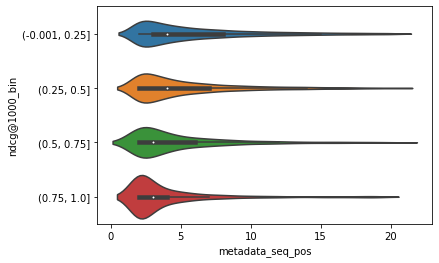

In [24]:
ax = sns.violinplot(x='metadata_seq_pos', y='ndcg@1000_bin', data=preds_df)

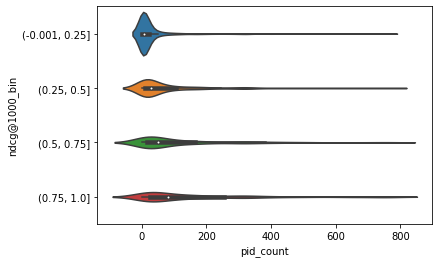

In [25]:
ax = sns.violinplot(x='pid_count', y='ndcg@1000_bin', data=preds_df)

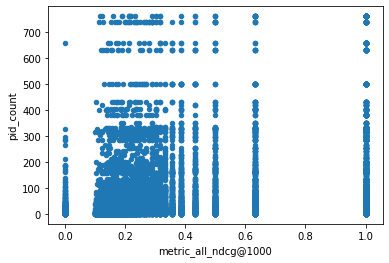

In [26]:
preds_df.plot.scatter(y='pid_count', x='metric_all_ndcg@1000')

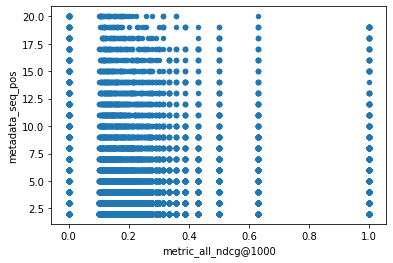

In [27]:
preds_df.plot.scatter(y='metadata_seq_pos', x='metric_all_ndcg@1000')